<a name = "inicio"></a>
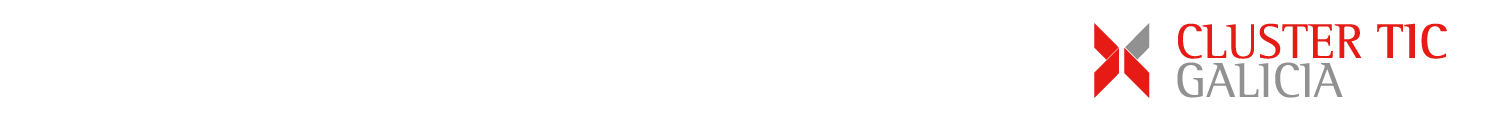

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Personalización de otros elementos</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
generator = np.random.Generator(np.random.PCG64(seed = 0))
names = lambda obj: print([name for name in dir(obj) if name[0] != "_"])

Hay dos elementos hasta cierto punto un tanto independientes: el grid o rejilla a mostrar sobre nuestra gráfica y la leyenda. En esta sección veremos cómo mostrar estos elementos y cómo personalizarlos.

### Grid

Frecuentemente resulta conveniente mostrar sobre nuestrá gráfica un grid (o rejilla) que sirva de referencia para facilitar la interpretación de los datos. Compárense, por ejemplo, estas dos gráficas:

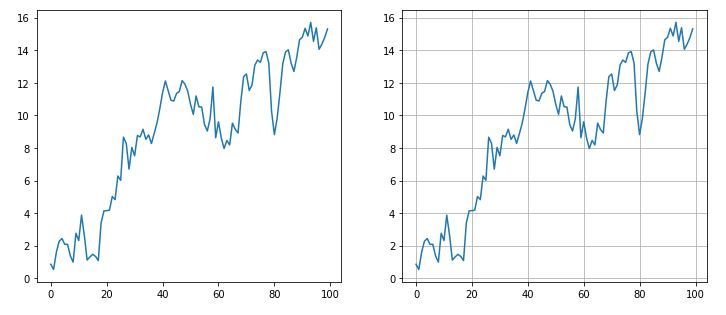

No cabe duda de que resulta más sencillo hacerse una idea de los valores que ocupan los máximos y mínimos locales con la ayuda de esta rejilla. Por supuesto, no siempre va a interesar transmitir esta información pero, cuando interese, mostrar el grid y personalizarlo resulta especialmente sencillo. Para mostrarlo tenemos la función [matplotlib.pyplot.grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) o, en el estilo OO, el método [grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html) a ejecutar sobre una variable referenciando un conjunto de ejes.

Hay que mencionar que el grid se muestra sobre las marcas visibles de los ejes. Esto significa que si deseamos ver el grid también sobre las marcas secundarias, deberemos mostrarlas previamente.

Comencemos con un sencillo ejemplo de uso de la función grid:

In [3]:
y = generator.standard_normal(100).cumsum()

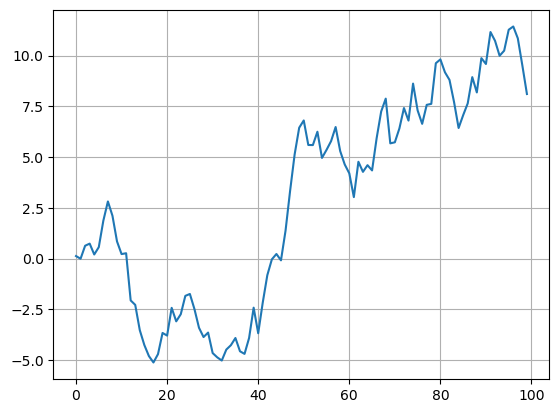

In [4]:
fig, ax = plt.subplots()
ax.plot(y)
ax.grid()
plt.show()

En los enlaces anteriores que apuntan a la documentación de la función y del método *grid()* tenemos acceso a los diferentes parámetros que nos permiten configurarlo, destacando:

* **alpha**: Grado de transparencia
* **color**: Color de las líneas del grid
* **linestyle**: Estilo de las líneas ('-', '--', '-.', ':', etc.)
* **linewidth**: Ancho de las líneas

En el siguiente ejemplo se fijan dichos parámetros:

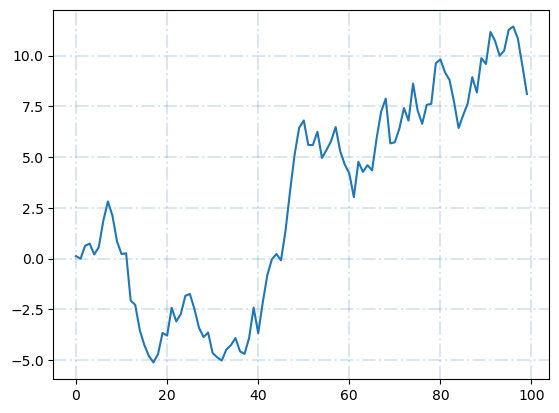

In [5]:
fig, ax = plt.subplots()
ax.plot(y)
ax.grid(
    alpha = 0.2,
    color = "SteelBlue",
    linestyle = "-.",
    linewidth = 1.5
)
plt.show()

Tanto la función como el método *grid()* aceptan, además de los parámetros que personalizan los diferentes atributos, varios parámetros adicionales:

* **visible**: Booleano que indica si se muestran o no las líneas
* **which**: Este parámetro puede tomar los valores '*major*', '*minor*' o '*both*', indicando si estamos configurando el grid correspondiente a las marcas principales, a las secundarias o a ambas.
* **axis**: Parámetro que puede tomar los valores '*both*', '*x*' o '*y*', y que indica a qué eje vamos a aplicar la configuración.

Esto nos permite dar formato al grid con un alto grado de detalle. En el siguiente ejemplo estamos mostrando las marcas principales y las secundarias tanto para el eje $x$ como para el eje $y$, y estableciendo un formato diferente para cada uno de los conjuntos de marcas (eje x/principales, eje x/secundarias, eje y/principales y eje y/secundarias):

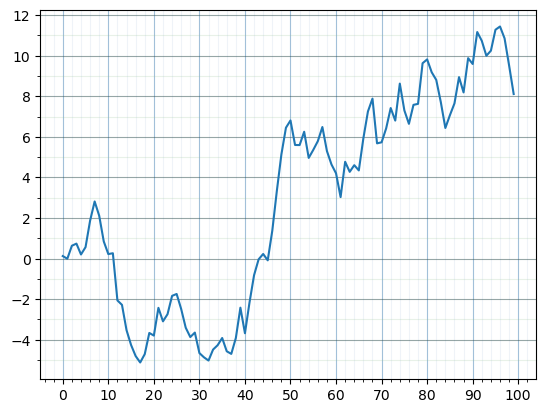

In [6]:
fig, ax = plt.subplots()
ax.plot(y)

# Eje x
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
# Eje y
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.grid(which = "major", axis = "x", color = "SteelBlue", alpha = 0.5)
ax.grid(which = "minor", axis = "x", color = "LightSteelBlue", alpha = 0.2)

ax.grid(which = "major", axis = "y", color = "DarkSlateGray", alpha = 0.5)
ax.grid(which = "minor", axis = "y", color = "DarkSeaGreen", alpha = 0.2)

plt.show()

### Leyenda

La función [matplotlib.pyplot.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) y el método [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) de un conjunto de ejes muestra la leyenda en el gráfico. Vimos en su momento que uno de los parámetros que podemos pasar a la función *plt.plot()* es **label**. Esta etiqueta es la que se mostrará en la leyenda representando a la gráfica. Para ver cómo funciona, partamos de dos conjuntos de datos a representar en sendas gráficas, y mostremos éstas con su *label* correspondiente:

In [7]:
y1 = generator.standard_normal(100).cumsum()
y2 = generator.standard_normal(100).cumsum()

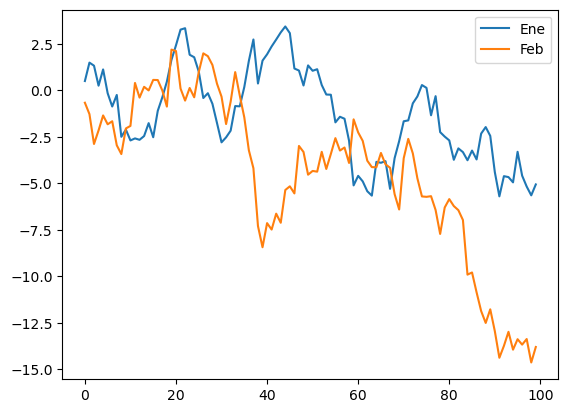

In [8]:
fig, ax = plt.subplots()
ax.plot(y1, label = "Ene")
ax.plot(y2, label = "Feb")
ax.legend()
plt.show()

Se ha aplicado a la primera gráfica la etiqueta "*Ene*" y a la segunda "*Feb*", y vemos que son precisamente estas etiquetas las que se muestran en la leyenda.

Estas etiquetas se pueden sobreescribir al llamar a la función o método *legend* si pasamos los nuevos valores como argumentos:

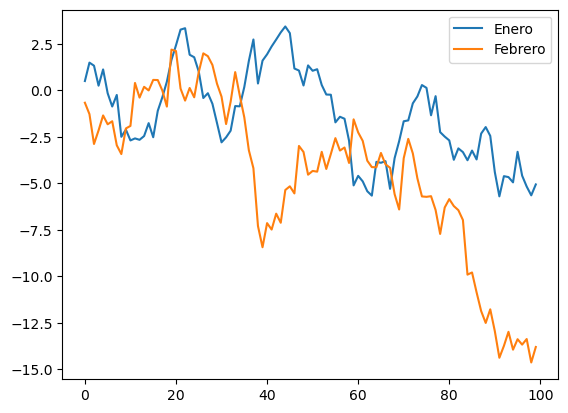

In [9]:
fig, ax = plt.subplots()
ax.plot(y1, label = "Ene")
ax.plot(y2, label = "Feb")
ax.legend(["Enero", "Febrero"])
plt.show()

El código de la imagen anterior es el mismo que el mostrado anteriormente salvo por el hecho de que, como argumento del método *.legend()*, se incluye una lista con las nuevas etiquetas.

La posición de la leyenda es determinada por Matplotlib en función de la distribución de las gráficas que se estén mostrando de forma que moleste lo menos posible. Pero podemos determinar la posición nosotros usando el parámetro **loc**. Éste puede tomar como valor una cadena de texto o un número:

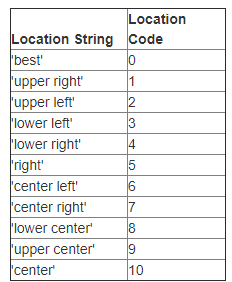

Por ejemplo, si deseásemos mostrar la leyenda en la esquina inferior derecha, el código a usar sería el siguiente:

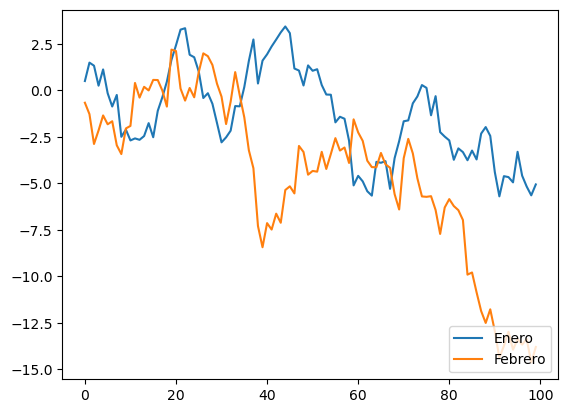

In [10]:
fig, ax = plt.subplots()
g1 = ax.plot(y1, label = "Ene")
g2 = ax.plot(y2, label = "Feb")
ax.legend(["Enero", "Febrero"], loc = "lower right")
plt.show()

Hemos usado la instrucción

ax.legend(["Enero", "Febrero"], loc = "lower right")

pero también podríamos haber usado

ax.legend(["Enero", "Febrero"], loc = "4")

También podemos pasar al parámetro *col* una tupla con la posición $x$ e $y$ de la leyenda con respecto al ancho y alto del área de la gráfica. Por ejemplo:

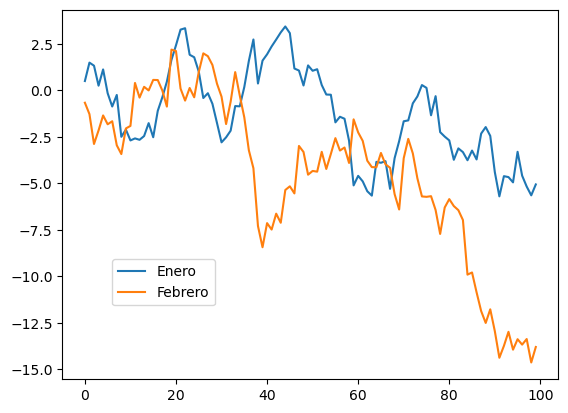

In [11]:
fig, ax = plt.subplots()
g1 = ax.plot(y1, label = "Ene")
g2 = ax.plot(y2, label = "Feb")
ax.legend(["Enero", "Febrero"], loc = (0.1, 0.2))
plt.show()

Hay, en todo caso, otros parámetros de esta función y método interesantes:

* **ncol**: este parámetro permite especificar el número de columnas en las que se van a mostrar las etiquetas en la leyenda (por defecto es 1):

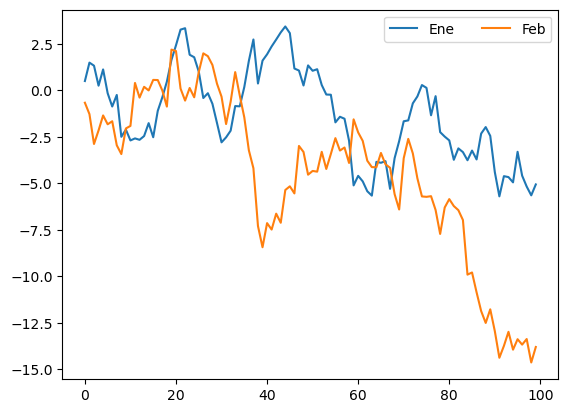

In [12]:
fig, ax = plt.subplots()
g1 = ax.plot(y1, label = "Ene")
g2 = ax.plot(y2, label = "Feb")
ax.legend(ncol = 2)
plt.show()

* **fontsize**: Este parámetro determina el tamaño de la fuente.
* **shadow**: Muestra u oculta una sombra alrededor de la leyenda.
* **facecolor**: Establece el color de fondo de la leyenda.
* **edgecolor**: Establece el color del borde de la leyenda.
* **title**: Fija un título para la leyenda
* **title_fontsize**: Establece el tamaño del título de la leyenda

En el siguiente ejemplo se hace uso de estos parámetros:

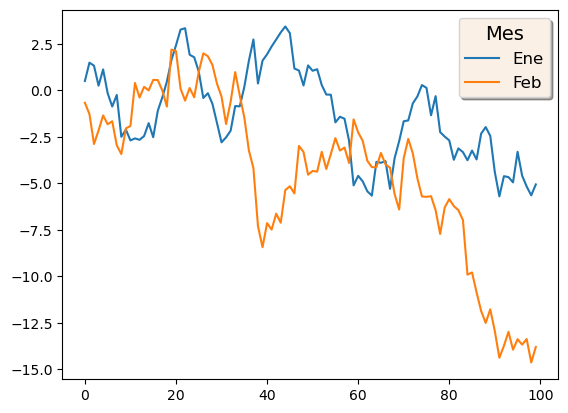

In [13]:
fig, ax = plt.subplots()
g1 = ax.plot(y1, label = "Ene")
g2 = ax.plot(y2, label = "Feb")
ax.legend(
    fontsize = 12,
    shadow = True,
    facecolor = "Linen",
    edgecolor = "LightGray",
    title = "Mes",
    title_fontsize = 14
)
plt.show()

En la documentación podemos encontrar el listado completo de parámetros que podemos usar.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>